# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import numpy as np
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive

 23B3949.pdf				     Homer
'Aadhaar - Aarav.pdf'			    'IITB Videos'
"Aadhaar-Shilpa Ma'am.pdf"		     IMG_20240403_161740.pdf
'Anjali 10th Marksheet.pdf'		    'JEE Advance FEE Reciept.pdf'
'Anjali photo.jpg'			    'Mains Application no. and Details.pdf'
 Bart					    'SoC Resources'
'Colab Notebooks'			    'SoS-Mid term report.pdf'
'Copy of ITSP 2024 Abstract Template.gdoc'  'Spotlight Memories'
 data					     VID-20211018-WA0006.mp4
 Data					     VID20211028173911.mp4
'DATA SCIENCE.pdf'			     VID-20220224-WA0008.mp4
 data.txt				     VID20220227212319.mp4
'Document from ..pdf'


In [3]:
!ls /content/drive/MyDrive/Data

Cheetah  Crocodile  Elephants  Tiger


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [4]:
shortcut_path = '/content/drive/MyDrive/Data'
batch_size = 32
img_height = 180
img_width = 180
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    shortcut_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    shortcut_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1657 files belonging to 4 classes.
Using 1326 files for training.
Found 1657 files belonging to 4 classes.
Using 331 files for validation.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [5]:
# train_iterator = train_dataset.as_numpy_iterator()
# validation_iterator = validation_dataset.as_numpy_iterator()
data = train_dataset.concatenate(validation_dataset)
data_iterator = data.as_numpy_iterator()

In [6]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

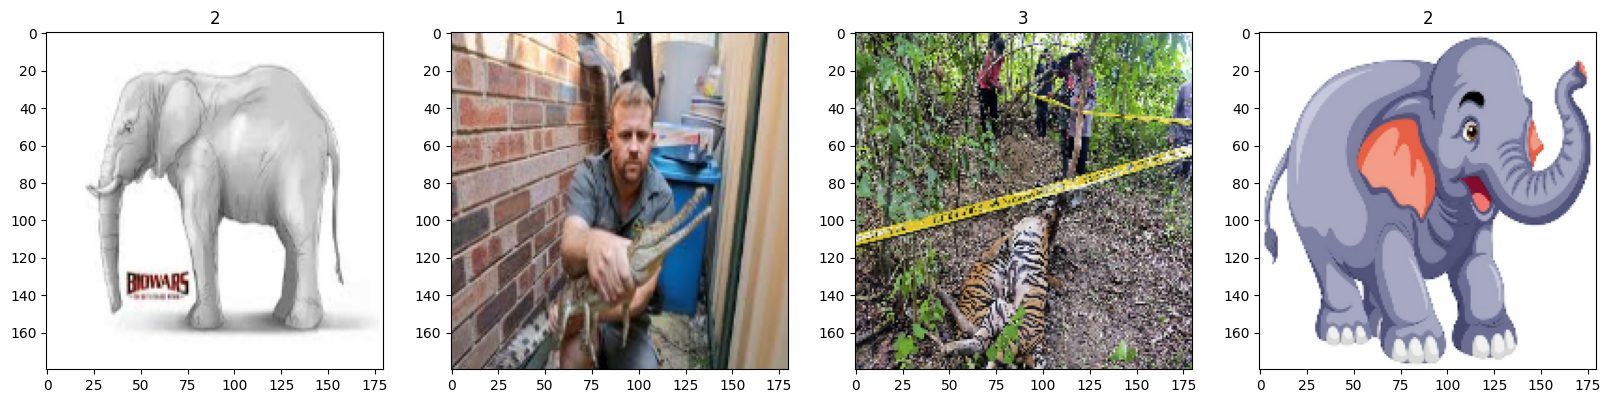

In [7]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [8]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
data=data.map(lambda x, y: (normalization_layer(x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [23]:
#Your code here
train_size = int(0.9 * len(data))
test_size = len(data) - train_size
train_dataset = data.take(train_size)
test_dataset = data.skip(train_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [24]:
model=models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [26]:
model.fit(train_dataset, epochs=11)

Epoch 1/11
47/47 [==============================] - 15s 210ms/step - loss: 1.4352 - accuracy: 0.3096
Epoch 2/11
47/47 [==============================] - 13s 228ms/step - loss: 1.2357 - accuracy: 0.4704
Epoch 3/11
47/47 [==============================] - 13s 230ms/step - loss: 1.0638 - accuracy: 0.5633
Epoch 4/11
47/47 [==============================] - 13s 224ms/step - loss: 0.8413 - accuracy: 0.6615
Epoch 5/11
47/47 [==============================] - 13s 220ms/step - loss: 0.6779 - accuracy: 0.7342
Epoch 6/11
47/47 [==============================] - 13s 227ms/step - loss: 0.5114 - accuracy: 0.8122
Epoch 7/11
47/47 [==============================] - 13s 225ms/step - loss: 0.4393 - accuracy: 0.8419
Epoch 8/11
47/47 [==============================] - 13s 233ms/step - loss: 0.3964 - accuracy: 0.8506
Epoch 9/11
47/47 [==============================] - 13s 229ms/step - loss: 0.2598 - accuracy: 0.9105
Epoch 10/11
47/47 [==============================] - 13s 230ms/step - loss: 0.2612 - accura

**Q.8** Test your code with test set

In [27]:
loss,accuracy=model.evaluate(test_dataset)

6/6 [==============================] - 12s 16ms/step - loss: 0.1621 - accuracy: 0.9591


In [28]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**